# Intro to Neural Networks Assignment

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:  
this is the left-most layer of neurons of a NN, in which the data space of the network is defined.  

### Hidden Layer:  
any layer between the input layer and the output layer; receives output from an earlier layer, applies some function to that information for each neuron in the layer, and pushes the new output to the next layer in the NN.  
  
### Output Layer:  
this is the right-most layer of neurons of a NN, which uses input of nearest hidden layer to return probabilities for the outcomes of interest.
  
### Neuron:  
a container for a floating-point number that ranges between 0.0 and 1.0; columns of neurons form layers. 
  
### Weight:  
a numeric value multiplied by the respective inputs into a given layer (except for output layer?); weighting relates input data to output data.     
  
### Activation Function:  
a function that is used to reshape input data into the range of 0, 1, thus creating a unique "activation"; applied to each neuron of a given layer; ReLU (for rectified linear unit) is currently a popular activation function, $f(x)=\max(0, x)$.

### Node Map:  
a diagram of the topology of a given neural network; defining various kinds of cells (neurons), it shows how those cells combine in layers, and how those layers assemble themselves relative to one another, to form the NN.  
  
### Perceptron:  
the simplest kind of NN, it has no hidden layers; has an input layer that is weighted then passed through an activation function to return the output layer.  
  
### Bias:  
an integer used in combination with weight to optimize a given layer's explanation of patterns in data of that layer.

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

Every layer of a NN receives inputs. Every layer except the output layer has a weight applied to (multiplied by) the value of each neuron in that layer; each of those neuronal products then summed; and a layer-specific bias then added to each sum of products. Each of these new float values is then passed into the layer-specific activation function, which generates new values. These new values become the inputs for the next layer in the NN. It's key to note that each neuron in a given layer passes input to each neuron in the immediately adjacent layer.  
  
The flow of information begins at the input layer and ends at the output layer.

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [90]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Define x1 and x2

x1 = [0, 1, 0, 1]
x2 = [0, 0, 1, 1]


# Write logic for NAND gate, which will return 'actual' output
def nand_perceptron(list1, list2):
    output = []
    for tup in [tuple([val1, val2]) for val1, val2 in zip(list1, list2)]:
        if tup == (1, 1):
            output.append(0)
        else:
            output.append(1)
    return output


# Compare actual and expected

expected = [1, 1, 1, 0]
actual = nand_perceptron(x1, x2)
assert actual == expected

In [ ]:
# Okay, let me do this more accurately with an assist from RA/LSDS, DR/LSDS01

inputs = np.array(list(zip(x1, x2, np.ones(4))))  # zips x1 and x2, plus adds in a column of ones for bias
print('inputs are:', inputs)
correct_outputs = np.array([[1], [1], [1], [0]])  # key logic here: only if all inputs are True, does output
                                                  # return False
print('correct_outputs are:', correct_outputs, '\n')
weights = 2 * np.random.random((3,1)) - 1


def sigmoid(x):  # activation function that returns output in range(0, 1)
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


for iteration in range(10000):
    # Weighted sum of inputs and weights
    weighted_sum = np.dot(inputs, weights)

    # Activate with sigmoid function
    activated_output = sigmoid(weighted_sum)

    # Calculate Error
    error = correct_outputs - activated_output

    # Calculate weight adjustments with sigmoid_derivative
    adjustments = error * sigmoid_derivative(activated_output)

    # Update weights
    weights += np.dot(inputs.T, adjustments)
  
print('optimized weights after training: ')
print(weights)

print("\noutputs after training:")
print(activated_output)

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [54]:
# Load data

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')

In [55]:
df.isna().sum().sum(), df.shape

(0, (768, 9))

In [56]:
df.head()  # target is clearly 'Outcome', a class variable for ultimate diabetes onset (1) or not (0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [58]:
df.Outcome[(df.BMI > 30) & (df.Glucose > 120)].value_counts()

1    163
0     85
Name: Outcome, dtype: int64

In [59]:
# Randomly sample 50 women from each class, then concatenate these samples into one new dataframe
# see https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/

negative_samples = df[df.Outcome == 0].sample(50)
pos_samples = df[df.Outcome == 1].sample(50)
samples_df = pd.concat([negative_samples, pos_samples])

In [60]:
samples_df.Outcome.value_counts()

1    50
0    50
Name: Outcome, dtype: int64

In [61]:
# Create y [Outcome] matrix

y = samples_df.Outcome.values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [62]:
# Recast zeroes [ie, non-diabetes outcomes] in y matrix to -1

y = np.where(y == 0, -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [87]:
# Pick 2 features from df and create X matrix

X = samples_df[['Pregnancies', 'Glucose']].values
# X

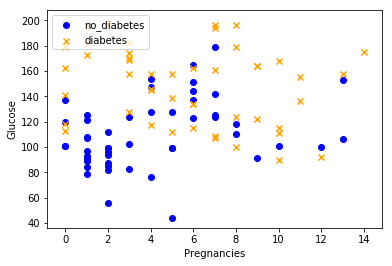

In [88]:
# Plot X, y scatter; hat tip RA/LSDS

plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='o', label='no_diabetes')
plt.scatter(X[50:100, 0], X[50:100, 1], color='orange', marker='x', label='diabetes')
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.legend(loc='upper left')
plt.show()

In [75]:
# Implement perceptron code from RA/LSDS

class Perceptron():
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        """
        Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """
        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
                self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

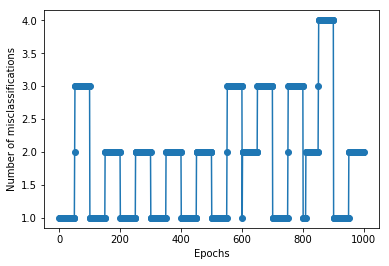

In [89]:
# Also credit RA/LSDS

pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

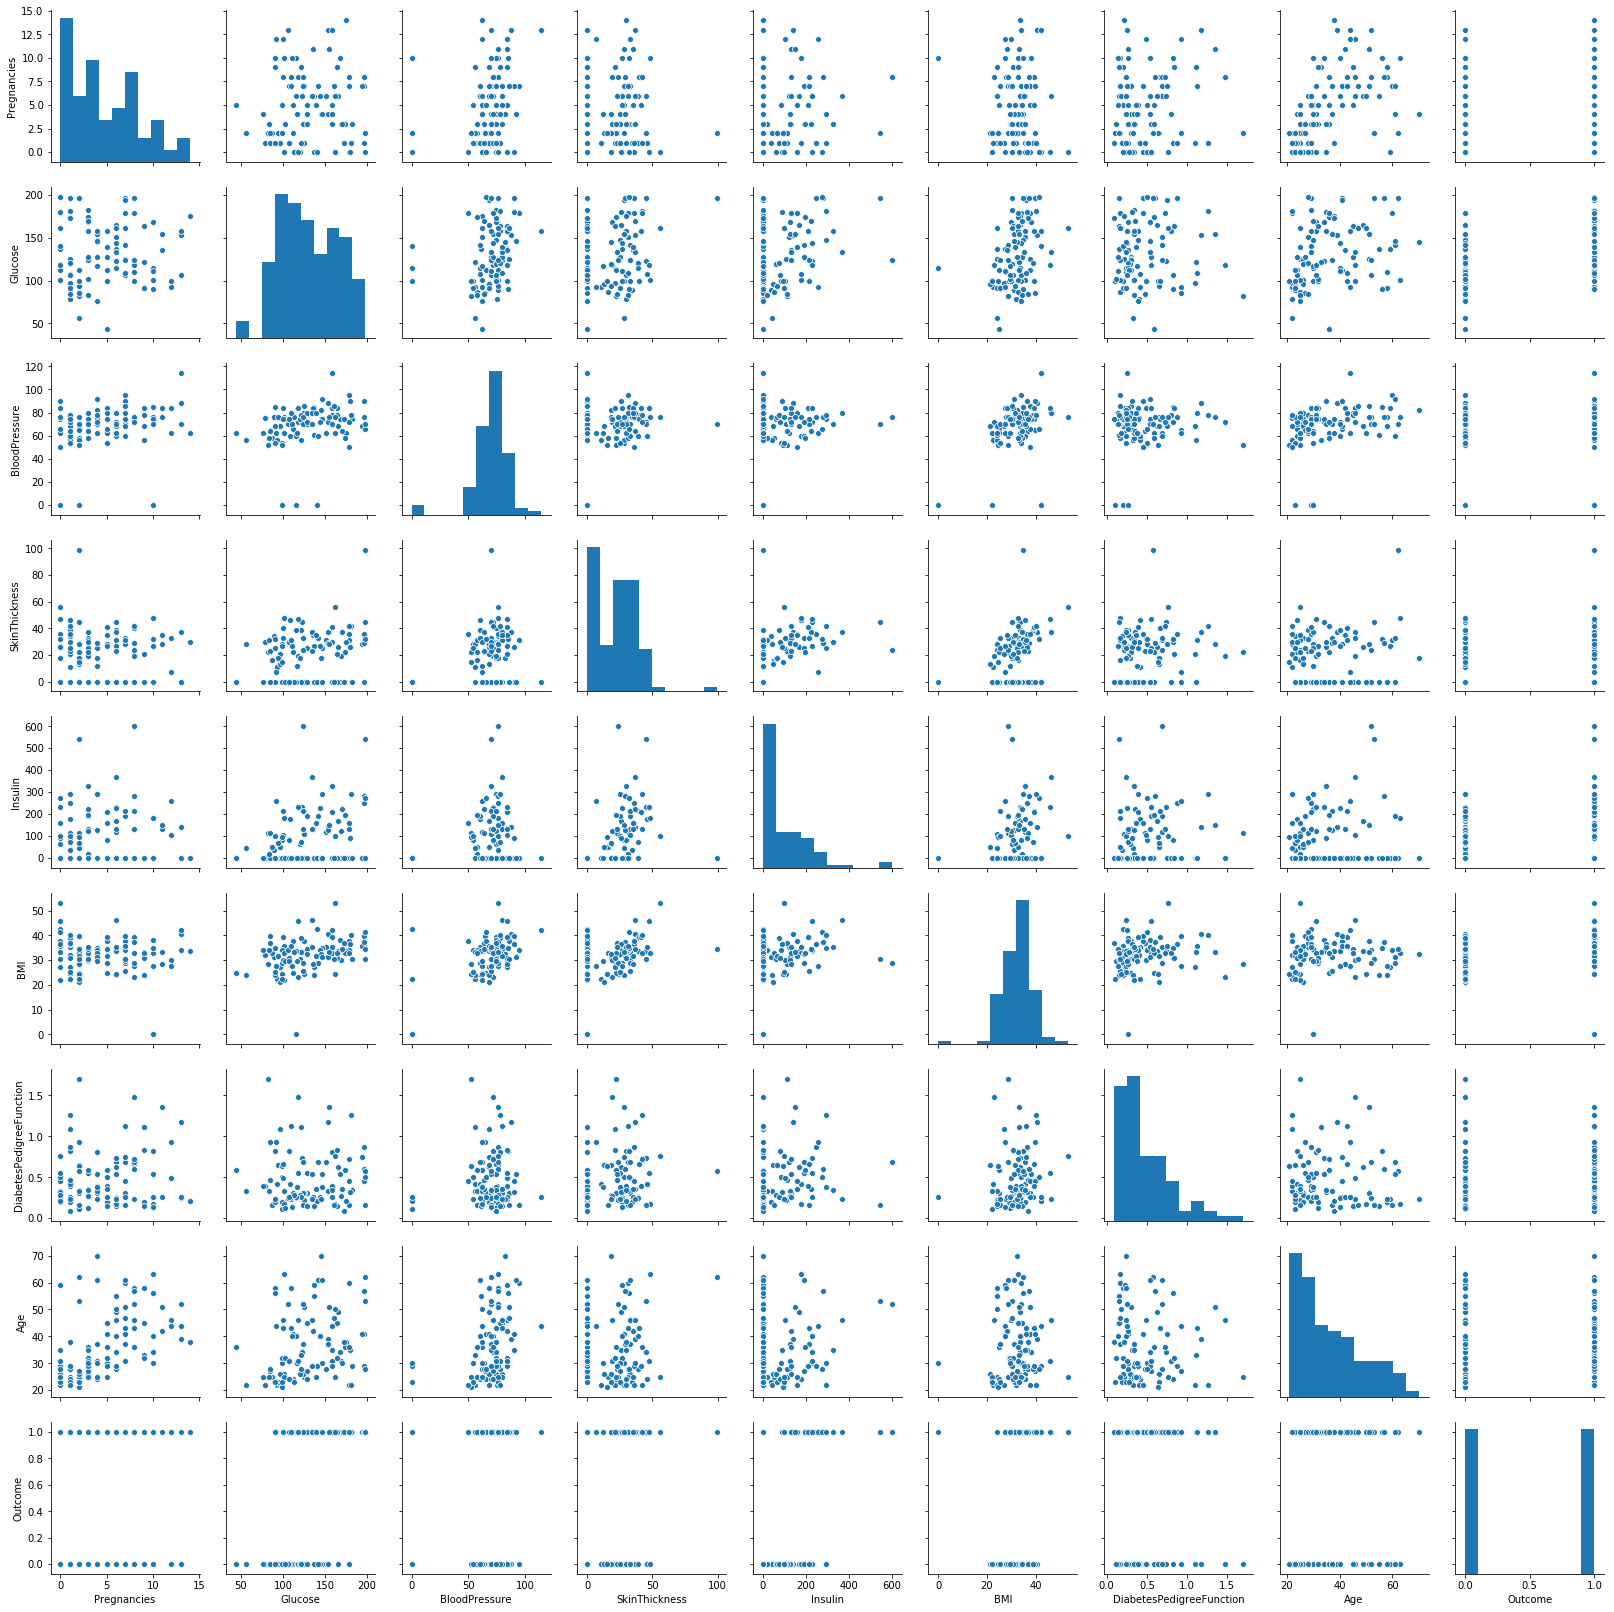

In [93]:
# Check a pair plot

sns.pairplot(samples_df);

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?